# BEATS TDR Chapter 07f: Optics - Raytracing
Raytrcing calculations for the BEATS TDR 

______________________________________________________

Author:         Gianluca Iori (gianthk.iori@gmail.com)

Created on:   31/01/2020

Last update:  16/08/2020
______________________________________________________


In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy as sc
from pandas_ods_reader import read_ods
import h5py
from scipy.constants import c, h

In [2]:
%matplotlib inline

## 3PW flux in 1mrad horizontal angle – comparison with other tomography beamlines 
##### Follow link to the notebook -> [BEATS raytracing: 3PW flux in 1mrad of Hor. acceptance](BEATS_TDR-Chapter_07f_Optics_Raytracing-Flux_1mrad.ipynb)

## 07f_a: Beam profiles / Usable beam size and Fixed Mask size

#### Read beam profiles @ 7.4m (Fixed Mask) from Shadow

In [3]:
source_plots_dir = './beam_profiles/'
profile_7428mm_8keV = np.load(source_plots_dir + 'BEATS_beam_8keV_7428mm.npy')
X_7428mm_8keV = pd.read_csv(source_plots_dir + 'BEATS_beam_8keV_7428mm_X.csv', sep=',', names=['X', 'I'], skiprows=[0])
Y_7428mm_8keV = pd.read_csv(source_plots_dir + 'BEATS_beam_8keV_7428mm_Y.csv', sep=',', names=['Y', 'I'], skiprows=[0])

profile_7428mm_20keV = np.load(source_plots_dir + 'BEATS_beam_20keV_7428mm.npy')
X_7428mm_20keV = pd.read_csv(source_plots_dir + 'BEATS_beam_20keV_7428mm_X.csv', sep=',', names=['X', 'I'], skiprows=[0])
Y_7428mm_20keV = pd.read_csv(source_plots_dir + 'BEATS_beam_20keV_7428mm_Y.csv', sep=',', names=['Y', 'I'], skiprows=[0])

#### Position and aperture of the Fixed Mask

In [7]:
mask_divergence = np.array([1.0, 0.36])*1e-3 # [mrad] (Hor. x Ver.)
mask_d = 7.428 # [m]
mask_aperture = mask_divergence * mask_d * 1e3
print(f"Fix Mask size: {mask_aperture[0]:.2f} x {mask_aperture[1]:.2f} [mm^2] (Hor. x Ver.)")
print(f"BL divergence: {1e3*mask_divergence[0]:.2f} x {1e3*mask_divergence[1]:.2f} [mrad] (Hor. x Ver.)")

mask = np.array([[-mask_aperture[0]/2, mask_aperture[0]/2], [-mask_aperture[1]/2, mask_aperture[1]/2]])

Fix Mask size: 7.43 x 2.67 [mm^2] (Hor. x Ver.)
BL divergence: 1.00 x 0.36 [mrad] (Hor. x Ver.)


#### Plots

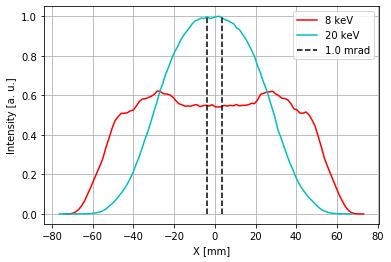

In [5]:
# plot X-intensity
norm = np.array([profile_7428mm_8keV[40:60,:].sum(axis=0).max(), profile_7428mm_20keV[40:60,:].sum(axis=0).max()]).max()

f = plt.figure()
plt.plot(X_7428mm_8keV['X']*0.001, profile_7428mm_8keV[40:60,:].sum(axis=0)/norm, 'r',
        X_7428mm_20keV['X']*0.001, profile_7428mm_20keV[40:60,:].sum(axis=0)/norm, 'c',
        np.array([mask[0,0], mask[0,0]]), np.array([0, 1]), '--k',
        np.array([mask[0,1], mask[0,1]]), np.array([0, 1]), '--k')

plt.xlabel('X [mm]')
plt.ylabel('Intensity [a. u.]')
plt.grid(True, which="both")

plt.legend(["8 keV", "20 keV", f"{mask_divergence[0]*1e3} mrad"], loc='upper right')
# f.savefig("beam_profile_X_8-20keV_7.4m.png", bbox_inches='tight', dpi=600)

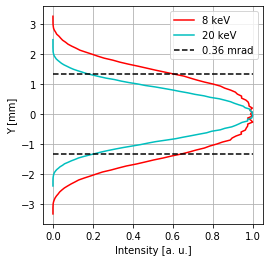

In [6]:
# plot Y-intensity
norm = np.array([profile_7428mm_8keV[:,40:60].sum(axis=1).max(), profile_7428mm_20keV[:,40:60].sum(axis=1).max()])

f, ax = plt.subplots()
plt.plot(profile_7428mm_8keV[:,40:60].sum(axis=1)/norm[0], Y_7428mm_8keV['Y']*0.001, 'r',
        profile_7428mm_20keV[:,40:60].sum(axis=1)/norm[1], Y_7428mm_20keV['Y']*0.001, 'c',
        np.array([0, 1]), np.array([mask[1,0], mask[1,0]]), '--k',
        np.array([0, 1]), np.array([mask[1,1], mask[1,1]]), '--k')

ax.set_aspect(0.15)
plt.xlabel('Intensity [a. u.]')
plt.ylabel('Y [mm]')
plt.grid(True, which="both")

plt.legend(["8 keV", "20 keV", f"{mask_divergence[1]*1e3} mrad"], loc='upper right')
# f.savefig("beam_profile_Y_8-20keV_7.4m.png", bbox_inches='tight', dpi=600)

Text(-55, 1.3, '20keV; 7.4 m')

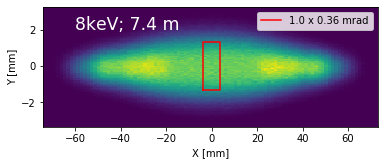

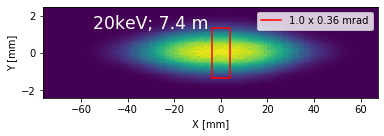

In [6]:
# plot beam snapshot
f, ax = plt.subplots()
plt.imshow(profile_7428mm_8keV, extent=[X_7428mm_8keV['X'].min()*0.001,X_7428mm_8keV['X'].max()*0.001,Y_7428mm_8keV['Y'].min()*0.001,Y_7428mm_8keV['Y'].max()*0.001], aspect=8)
plt.plot(np.array([mask[0,0], mask[0,1], mask[0,1], mask[0,0], mask[0,0]]), np.array([mask[1,0], mask[1,0], mask[1,1], mask[1,1], mask[1,0]]), 'r')
plt.xlabel('X [mm]')
plt.ylabel('Y [mm]')
plt.legend([f"{mask_divergence[0]*1e3} x {mask_divergence[1]*1e3} mrad"], loc='upper right')
ax.annotate('8keV; 7.4 m', xy=(-60, 2), xytext=(-60, 2), fontsize='xx-large', c='w')
# f.savefig("beam_snapshot_8keV_7.4m.png", bbox_inches='tight', dpi=600)

f, ax = plt.subplots()
plt.imshow(profile_7428mm_20keV, extent=[X_7428mm_20keV['X'].min()*0.001,X_7428mm_20keV['X'].max()*0.001,Y_7428mm_20keV['Y'].min()*0.001,Y_7428mm_20keV['Y'].max()*0.001], aspect=8)
plt.plot(np.array([mask[0,0], mask[0,1], mask[0,1], mask[0,0], mask[0,0]]), np.array([mask[1,0], mask[1,0], mask[1,1], mask[1,1], mask[1,0]]), 'r')
plt.xlabel('X [mm]')
plt.ylabel('Y [mm]')
plt.legend([f"{mask_divergence[0]*1e3} x {mask_divergence[1]*1e3} mrad"], loc='upper right')
ax.annotate('20keV; 7.4 m', xy=(-55, 1.3), xytext=(-55, 1.3), fontsize='xx-large', c='w')
# f.savefig("beam_snapshot_20keV_7.4m.png", bbox_inches='tight', dpi=600)

## 07f_a: White beam snapshots @ several BL positions

#### Read beam profiles from Shadow

In [5]:
source_plots_dir = './beam_profiles/'
WB_FixedMask = np.load(source_plots_dir + 'BEATS_WB_7428mm_withCrotch.npy')
X_WB_FixedMask = pd.read_csv(source_plots_dir + 'BEATS_WB_7428mm_withCrotch_X.csv', sep=',', names=['X', 'I'], skiprows=[0])
Y_WB_FixedMask = pd.read_csv(source_plots_dir + 'BEATS_WB_7428mm_withCrotch_Y.csv', sep=',', names=['Y', 'I'], skiprows=[0])

source_plots_dir = './beam_profiles/'
WB_CVD1 = np.load(source_plots_dir + 'BEATS_WB_9m_withMask.npy')
X_WB_CVD1 = pd.read_csv(source_plots_dir + 'BEATS_WB_9m_withMask_X.csv', sep=',', names=['X', 'I'], skiprows=[0])
Y_WB_CVD1 = pd.read_csv(source_plots_dir + 'BEATS_WB_9m_withMask_Y.csv', sep=',', names=['Y', 'I'], skiprows=[0])

source_plots_dir = './beam_profiles/'
WB_CVD2 = np.load(source_plots_dir + 'BEATS_WB_CVD2_withMask.npy')
X_WB_CVD2 = pd.read_csv(source_plots_dir + 'BEATS_WB_CVD2_withMask_X.csv', sep=',', names=['X', 'I'], skiprows=[0])
Y_WB_CVD2 = pd.read_csv(source_plots_dir + 'BEATS_WB_CVD2_withMask_Y.csv', sep=',', names=['Y', 'I'], skiprows=[0])

source_plots_dir = './beam_profiles/'
WB_BeamStop = np.load(source_plots_dir + 'BEATS_WB_BeamStop_withMask.npy')
X_WB_BeamStop = pd.read_csv(source_plots_dir + 'BEATS_WB_BeamStop_withMask_X.csv', sep=',', names=['X', 'I'], skiprows=[0])
Y_WB_BeamStop = pd.read_csv(source_plots_dir + 'BEATS_WB_BeamStop_withMask_Y.csv', sep=',', names=['Y', 'I'], skiprows=[0])

source_plots_dir = './beam_profiles/'
WB_33m = np.load(source_plots_dir + 'BEATS_WB_33m_withMask.npy')
X_WB_33m = pd.read_csv(source_plots_dir + 'BEATS_WB_33m_withMask_X.csv', sep=',', names=['X', 'I'], skiprows=[0])
Y_WB_33m = pd.read_csv(source_plots_dir + 'BEATS_WB_33m_withMask_Y.csv', sep=',', names=['Y', 'I'], skiprows=[0])

source_plots_dir = './beam_profiles/'
WB_43m = np.load(source_plots_dir + 'BEATS_WB_43m_withMask.npy')
X_WB_43m = pd.read_csv(source_plots_dir + 'BEATS_WB_43m_withMask_X.csv', sep=',', names=['X', 'I'], skiprows=[0])
Y_WB_43m = pd.read_csv(source_plots_dir + 'BEATS_WB_43m_withMask_Y.csv', sep=',', names=['Y', 'I'], skiprows=[0])

Text(-13.5, 2.5, 'WB@7.4m')

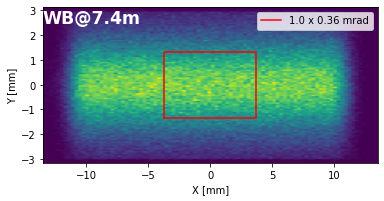

In [8]:
# plot beam snapshots
f, ax = plt.subplots()
plt.imshow(WB_FixedMask, extent=[X_WB_FixedMask['X'].min()*0.001,X_WB_FixedMask['X'].max()*0.001,Y_WB_FixedMask['Y'].min()*0.001,Y_WB_FixedMask['Y'].max()*0.001], aspect=2)
plt.plot(np.array([mask[0,0], mask[0,1], mask[0,1], mask[0,0], mask[0,0]]), np.array([mask[1,0], mask[1,0], mask[1,1], mask[1,1], mask[1,0]]), 'r')
plt.xlabel('X [mm]')
plt.ylabel('Y [mm]')
ax.set(xlim=(-13.5, 13.5), ylim=(-3.15, 3.15))
# plt.xticks(np.arange(-35, 40, 5))
# plt.yticks(np.arange(-8, 10, 2))
plt.legend([f"{mask_divergence[0]*1e3} x {mask_divergence[1]*1e3} mrad"], loc='upper right')
ax.annotate('WB@7.4m', xy=(-13.5, 2.5), xytext=(-13.5, 2.5), fontsize='xx-large', weight='bold', c='w')
# f.savefig("WB_snapshot_7.4m.png", bbox_inches='tight', dpi=600)

Text(-5.3, 1.4, 'WB@Window_1')

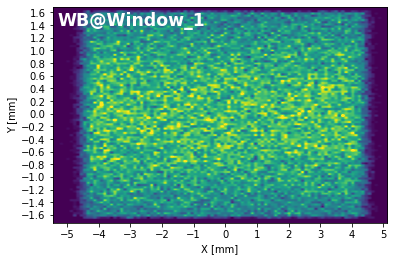

In [9]:
f, ax = plt.subplots()
plt.imshow(WB_CVD1, extent=[X_WB_CVD1['X'].min()*0.001,X_WB_CVD1['X'].max()*0.001,Y_WB_CVD1['Y'].min()*0.001,Y_WB_CVD1['Y'].max()*0.001], aspect=2)
plt.clim(0,28)
plt.xlabel('X [mm]')
plt.ylabel('Y [mm]')
plt.xticks(np.arange(-5, 6, 1))
plt.yticks(np.arange(-1.6, 1.8, 0.2))
ax.annotate('WB@Window_1', xy=(-5.3, 1.4), xytext=(-5.3, 1.4), fontsize='xx-large', weight='bold', c='w')
# f.savefig("WB_snapshot_CVD1.png", bbox_inches='tight', dpi=600)

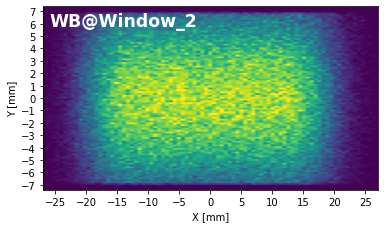

In [28]:
f, ax = plt.subplots()
plt.imshow(WB_CVD2, extent=[X_WB_CVD2['X'].min()*0.001,X_WB_CVD2['X'].max()*0.001,Y_WB_CVD2['Y'].min()*0.001,Y_WB_CVD2['Y'].max()*0.001], aspect=2)
plt.clim(0,84)
plt.xlabel('X [mm]')
plt.ylabel('Y [mm]')
plt.xticks(np.arange(-25, 30, 5))
plt.yticks(np.arange(-7, 7.5, 1))
ax.set(xlim=(-27, 27), ylim=(-7.4, 7.4))
ax.annotate('WB@Window_2', xy=(-26, 5.8), xytext=(-26, 5.8), fontsize='xx-large', weight='bold', c='w')
# f.savefig("WB_snapshot_CVD2.png", bbox_inches='tight', dpi=600)

Text(-35, 7, 'WB@BeamStop')

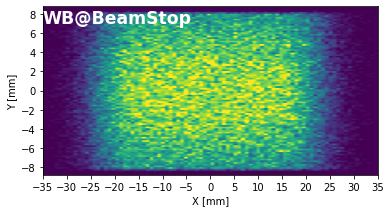

In [10]:
f, ax = plt.subplots()
plt.imshow(WB_BeamStop, extent=[X_WB_BeamStop['X'].min()*0.001,X_WB_BeamStop['X'].max()*0.001,Y_WB_BeamStop['Y'].min()*0.001,Y_WB_BeamStop['Y'].max()*0.001], aspect=2)
plt.clim(0,35)
plt.xlabel('X [mm]')
plt.ylabel('Y [mm]')
ax.set(xlim=(-35, 35), ylim=(-8.8, 8.8))
plt.xticks(np.arange(-35, 40, 5))
plt.yticks(np.arange(-8, 10, 2))
ax.annotate('WB@BeamStop', xy=(-35, 7), xytext=(-35, 7), fontsize='xx-large', weight='bold', c='w')
# f.savefig("WB_snapshot_BeamStop.png", bbox_inches='tight', dpi=600)

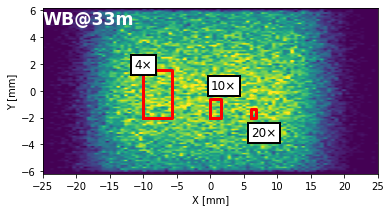

In [11]:
f, ax = plt.subplots()
plt.imshow(WB_33m, extent=[X_WB_33m['X'].min()*0.001,X_WB_33m['X'].max()*0.001,Y_WB_33m['Y'].min()*0.001,Y_WB_33m['Y'].max()*0.001], aspect=2)
plt.clim(0,35)
plt.xlabel('X [mm]')
plt.ylabel('Y [mm]')
ax.set(xlim=(-25, 25), ylim=(-6.2, 6.2))
plt.xticks(np.arange(-25, 30, 5))
plt.yticks(np.arange(-6, 8, 2))
ax.annotate('WB@33m', xy=(-25, 5), xytext=(-25, 5), fontsize='xx-large', weight='bold', c='w')
# annotate the detector Field Of View
FOV_1x = np.array([14.08, 11.65])
FOV_2x = np.array([7.04, 5.94])
FOV_4x = np.array([4.2, 3.54])
FOV_10x = np.array([1.6, 1.35])
FOV_20x = np.array([0.8, 0.675])

plt.plot(np.array([-10, -10+FOV_4x[0], -10+FOV_4x[0], -10, -10]), np.array([-2, -2, -2+FOV_4x[1], -2+FOV_4x[1], -2]), 'r', linewidth=3)
bbox_props = dict(boxstyle="square", fc="white", lw=2)
t = ax.text(-10, -1.6+FOV_4x[1], "4×", ha="center", va="center", size=12, bbox=bbox_props)

plt.plot(np.array([0, FOV_10x[0], FOV_10x[0], 0, 0]), np.array([-2, -2, -2+FOV_10x[1], -2+FOV_10x[1], -2]), 'r', linewidth=3)
bbox_props = dict(boxstyle="square", fc="white", lw=2)
t = ax.text(2, -1+FOV_10x[1], "10×", ha="center", va="center", size=12, bbox=bbox_props)

plt.plot(np.array([6, 6+FOV_20x[0], 6+FOV_20x[0], 6, 6]), np.array([-2, -2, -2+FOV_20x[1], -2+FOV_20x[1], -2]), 'r', linewidth=3)
bbox_props = dict(boxstyle="square", fc="white", lw=2)
t = ax.text(8, -4.5+FOV_10x[1], "20×", ha="center", va="center", size=12, bbox=bbox_props)
# f.savefig("WB_snapshot_33m.png", bbox_inches='tight', dpi=600)

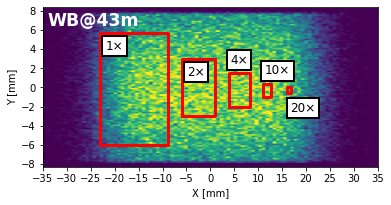

In [39]:
f, ax = plt.subplots()
plt.imshow(WB_43m, extent=[X_WB_43m['X'].min()*0.001,X_WB_43m['X'].max()*0.001,Y_WB_43m['Y'].min()*0.001,Y_WB_43m['Y'].max()*0.001], aspect=2)
plt.clim(0,35)
plt.xlabel('X [mm]')
plt.ylabel('Y [mm]')
ax.set(xlim=(-35, 35), ylim=(-8.3, 8.4))
plt.xticks(np.arange(-35, 40, 5))
plt.yticks(np.arange(-8, 10, 2))
ax.annotate('WB@43m', xy=(-34, 6.5), xytext=(-34, 6.5), fontsize='xx-large', weight='bold', c='w')
# annotate the detector Field Of View
plt.plot(np.array([-23, -23+FOV_1x[0], -23+FOV_1x[0], -23, -23]), np.array([-6, -6, -6+FOV_1x[1], -6+FOV_1x[1], -6]), 'r', linewidth=3)
bbox_props = dict(boxstyle="square", fc="white", lw=2)
t = ax.text(-20, -7.3+FOV_1x[1], "1×", ha="center", va="center", size=12, bbox=bbox_props)

plt.plot(np.array([-6, -6+FOV_2x[0], -6+FOV_2x[0], -6, -6]), np.array([-3, -3, -3+FOV_2x[1], -3+FOV_2x[1], -3]), 'r', linewidth=3)
bbox_props = dict(boxstyle="square", fc="white", lw=2)
t = ax.text(-3, -4.3+FOV_2x[1], "2×", ha="center", va="center", size=12, bbox=bbox_props)

plt.plot(np.array([4, 4+FOV_4x[0], 4+FOV_4x[0], 4, 4]), np.array([-2, -2, -2+FOV_4x[1], -2+FOV_4x[1], -2]), 'r', linewidth=3)
bbox_props = dict(boxstyle="square", fc="white", lw=2)
t = ax.text(6, -0.7+FOV_4x[1], "4×", ha="center", va="center", size=12, bbox=bbox_props)

plt.plot(np.array([11, 11+FOV_10x[0], 11+FOV_10x[0], 11, 11]), np.array([-1, -1, -1+FOV_10x[1], -1+FOV_10x[1], -1]), 'r', linewidth=3)
bbox_props = dict(boxstyle="square", fc="white", lw=2)
t = ax.text(14, 0.4+FOV_10x[1], "10×", ha="center", va="center", size=12, bbox=bbox_props)

plt.plot(np.array([16, 16+FOV_20x[0], 16+FOV_20x[0], 16, 16]), np.array([-0.6, -0.6, -0.6+FOV_20x[1], -0.6+FOV_20x[1], -0.6]), 'r', linewidth=3)
bbox_props = dict(boxstyle="square", fc="white", lw=2)
t = ax.text(19.4, -3.5+FOV_10x[1], "20×", ha="center", va="center", size=12, bbox=bbox_props)
f.savefig("WB_snapshot_43m_2.png", bbox_inches='tight', dpi=600)

## 07f_b: White beam size at sample

In [40]:
%matplotlib inline
font = {'weight' : 'normal',
        'size'   : 18}
matplotlib.rc('font', **font)

### Primary slits OPEN
THe beamline divergence is defined uniquely by the aperture of the fixed mask
#### Fixed mask position and size

In [41]:
mask_divergence = np.array([1.0, 0.36])*1e-3 # [mrad] (Hor. x Ver.)
mask_d = 7.428 # [m]
mask_aperture = mask_divergence * mask_d * 1e3
print("Fix mask Hor. size for %.2f mrad acceptance angle: %.3f mm"%(mask_divergence[0]*1e3, mask_aperture[0]))
print("Fix mask Ver. size for %.2f mrad acceptance angle: %.3f mm"%(mask_divergence[1]*1e3, mask_aperture[1]))

Fix mask Hor. size for 1.00 mrad acceptance angle: 7.428 mm
Fix mask Ver. size for 0.36 mrad acceptance angle: 2.674 mm


#### FOV with foreseen with 1x magnification microscope and PCO.edge5.5 detector
See values for the microscope optics @ ID19 [here](http://www.esrf.eu/UsersAndScience/Experiments/Imaging/ID19/BeamlineDescription/Detectors/Frelon_intro/Frelon_optics)

In [44]:
PCOedge_pixels = 2560
mic_pixelsize = np.array([0.72, 3.61, 7.2, 0.33, 3.25, 6.6]) # [micron] (Max. and Min.) OptiquePeter TwinMic and Revolver microscopes
FOV = 1e-3*PCOedge_pixels*mic_pixelsize # [mm]
print("Maximum Horizontal FOV: %.3f mm"%(FOV.max()))

Maximum Horizontal FOV: 18.432 mm


#### Photon source properties from Shadow (8 - 50 keV) 

In [72]:
ss_x = 1839e-6 # [m] Hor. photon source size (FWHM)
ss_y = 32e-6 #  [m] Ver. photon source size (FWHM)
ss_x_p = 8210e-6 # [rad] Hor. divergence (FWHM)
ss_y_p = 325e-6 # [rad] Ver. divergence (FWHM)

#### Effective divergence

In [73]:
eta_x = 2*np.sqrt((ss_x/2)**2 + (mask_aperture[0]/2)**2)/(mask_d)
eta_y = 2*np.sqrt((ss_y/2)**2 + (mask_aperture[1]/2)**2)/(mask_d)
print(f"Effective Hor. divergence: {mask_divergence[0]*1e3} -> %.2f [mrad]"%((eta_x)))

if ss_y_p < eta_y:
    print(f"Effective Ver. divergence: {mask_divergence[1]*1e3} -> %.2f [mrad] > Source Ver. divergence: %.2f [mrad]"%((eta_y), (ss_y_p*1e3)))
    # print(f"Source Ver. divergence: %.4f [mrad]"%((ss_y_p*1e3)))
    eta_y = ss_y_p*1e3
else:
    print(f"Effective Ver. divergence: {mask_divergence[1]*1e3} -> %.4f [mrad]"%((eta_y)))    

Effective Hor. divergence: 1.0 -> 1.00 [mrad]
Effective Ver. divergence: 0.36 -> 0.36 [mrad] > Source Ver. divergence: 0.33 [mrad]


#### Beam size @ sample

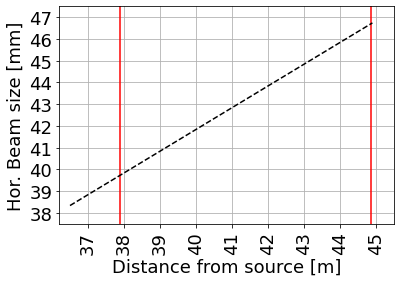

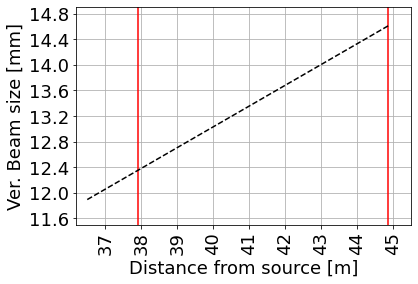

In [68]:
# HORIZONTAL
SDD = np.arange(36.5, 44.965, 0.2) # Sample Detector Distance [m] entrance of exp. hutch to beam stop
d_window2 = 37.900 # [m] Window 2
d_bs = 44.865 # [m] Beam Stop
f, ax = plt.subplots()
plt.plot([d_window2, d_window2], [20, 48], 'r')
plt.plot([d_bs, d_bs], [20, 48], 'r')
plt.plot(SDD, 1e3*(ss_x+(np.sin(eta_x*1e-3)*SDD)), '--k')
plt.xlabel('Distance from source [m]')
plt.ylabel('Hor. Beam size [mm]')
plt.xticks(np.arange(31, 46, 1))
plt.xticks(rotation=90)
plt.yticks(np.arange(33, 55, 1))
ax.set(xlim=(36.2, 45.5), ylim=(37.5, 47.5))
plt.grid(True, which="both")
# plt.legend(['Window 2 pos', 'Hor. beam width'], loc='upper center')
f.savefig("Hor_beam_size.png", bbox_inches='tight', dpi=600)

# VERTICAL
f, ax = plt.subplots()
plt.plot([d_window2, d_window2], [10, 18], 'r')
plt.plot([d_bs, d_bs], [10, 18], 'r')
plt.plot(SDD, 1e3*(ss_y+(np.sin(eta_y*1e-3)*SDD)), '--k')
plt.xlabel('Distance from source [m]')
plt.ylabel('Ver. Beam size [mm]')
plt.xticks(np.arange(31, 46, 1))
plt.xticks(rotation=90)
plt.yticks(np.arange(10, 16, 0.4))
ax.set(xlim=(36.2, 45.5), ylim=(11.5, 14.9))

plt.grid(True, which="both")
f.savefig("Ver_beam_size.png", bbox_inches='tight', dpi=600)

### Primary slits as secondary source

#### Import Shadow data

In [70]:
names = ['slit', 'FWHM_X', 'tot_rays', 'FWHM_Xp']
beamsizefilecsv = 'Oasys/BEATS_BL_beam_size.csv'
beamsizedata = pd.read_csv(beamsizefilecsv, sep=',', names=names, skiprows=[0, 1, 2, 3, 4])

#### Effective horizontal divergence

In [74]:
a = np.arange(2.0e-3, 0.1e-3, -0.05e-3) # primary slit aperture [m]
d_slits = 8.682 # [m] distance source - slits
d_sample = 43 # [m]

eta_x_2 = np.sqrt((ss_x/2)**2 + (a/2)**2)/(d_slits)   # half divergence

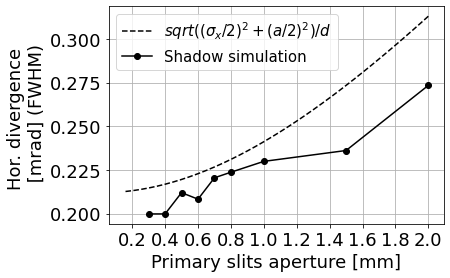

In [75]:
# Plot and compare with Shadow simulations
f, ax = plt.subplots()
plt.plot(a*1e3, 2e3*eta_x_2, '--k')
plt.plot(beamsizedata['slit'][0:9].astype('float'), 1e-3*beamsizedata['FWHM_Xp'][0:9].astype('float'), '-ok')
plt.xticks(np.arange(0.2, 2.1, 0.2))
plt.xlabel('Primary slits aperture [mm]')
plt.ylabel('Hor. divergence \n [mrad] (FWHM)')
plt.grid(True, which="both")
plt.legend(['$sqrt((\sigma_x/2)^2+(a/2)^2)/d$', 'Shadow simulation', '10 keV', '20 keV', '40 keV'], loc='upper left', fontsize='small')
# f.savefig("slit_VS_H_beam_divergence.png", bbox_inches='tight', dpi=600)

#### Horizontal beam size @ 43 m

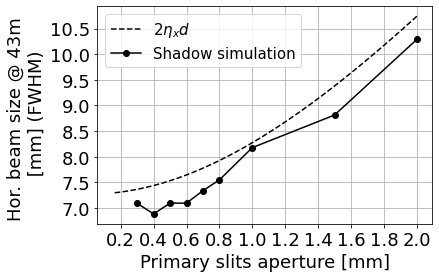

In [76]:
f, ax = plt.subplots()
plt.plot(a*1e3, 1e3*((2*eta_x_2)*(d_sample-d_slits)), '--k')
plt.plot(beamsizedata['slit'][0:9].astype('float'), 1e-3*beamsizedata['FWHM_X'][0:9].astype('float'), '-ok')
plt.xticks(np.arange(0.2, 2.1, 0.2))
plt.yticks(np.arange(7, 11, 0.5))
plt.xlabel('Primary slits aperture [mm]')
plt.ylabel('Hor. beam size @ 43m \n [mm] (FWHM)')
plt.grid(True, which="both")
plt.legend(['$2\eta_x d$', 'Shadow simulation', '10 keV', '20 keV', '40 keV'], loc='upper left', fontsize='small')
# f.savefig("slits_VS_Hor_beam_size.png", bbox_inches='tight', dpi=600)

# 07f_c: Coherence length and power
For the calculation of spatial coherence length and image blur see:

Cloetens, Peter. 2007. “Phase Contrast Imaging - Coherent Beams.” presented at the School on X-ray Imaging Techniques at the ESRF, ESRF, Grenoble, France, February 5. http://www.esrf.eu/files/live/sites/www/files/events/conferences/2007/xray-imaging-school/Presentations/07_Cloetens.pdf.


### Primary slits aperture VS coherence length

In [96]:
eN = np.arange(10e3,30e3,10e3) # 10 - 20 keV
l = (h*c)/(eN*1.6e-19) # wavelength [m]
ss_x_0 = 1.978e-3 # [m] Hor. photon source size (FWHM) @ 20keV
ss_x = np.arange(1.0e-3, 0.3e-3, -0.01e-3) # secondary source size (slit aperture) [m]
ss_x_topotomo = [0.5e-3, 0.5e-3] # [m] (FWHM)
z = d_sample-d_slits # [m] distance primary slits - sample @ 43m
z_topotomo = [33, 33] # [m]
lc_topotomo = 2*(np.multiply(l,z_topotomo)/ss_x_topotomo)*1e6

print("Coherence length @ 20keV:")
print("- ID19@ESRF (l=145m): %.2f [micron]"%((2*l[1]*145/25e-6)*1e6))
print("- TOMCAT@SLS (l=34m): %.2f [micron]"%((2*l[1]*34/140e-6)*1e6))
print("- SYRMEP@Elettra (l=23m): %.2f [micron]"%((2*l[1]*23/197e-6)*1e6))
print("- TopoTomo@ANKA (l=33m): %.2f [micron]"%((2*l[1]*33/0.5e-3)*1e6))
print("- BEATS - Primary slits OPEN (l=43m): %.2f [micron]"%((2*l[1]*43/ss_x_0)*1e6))

Coherence length @ 20keV:
- ID19@ESRF (l=145m): 720.09 [micron]
- TOMCAT@SLS (l=34m): 30.15 [micron]
- SYRMEP@Elettra (l=23m): 14.50 [micron]
- TopoTomo@ANKA (l=33m): 8.19 [micron]
- BEATS - Primary slits OPEN (l=43m): 2.70 [micron]


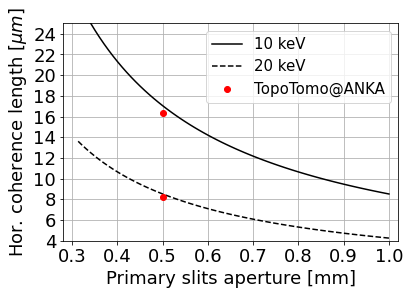

In [102]:
# plots
f, ax = plt.subplots()
plt.plot(ss_x*1e3,(2*l[0]*z/ss_x)*1e6, 'k') # 10keV
plt.plot(ss_x*1e3,(2*l[1]*z/ss_x)*1e6, '--k') # 20keV
plt.plot(np.multiply(ss_x_topotomo, 1e3), lc_topotomo, 'or') # TopoTomo@ANKA

ax.set(xlim=(0.3, 1.1), ylim=(0.5, 7))
plt.xticks(np.arange(0.3, 1.1, 0.1))
plt.yticks(np.arange(2, 34, 2))
ax.set(xlim=(0.28, 1.02), ylim=(4, 25))
plt.grid(True, which="both")
plt.legend(['10 keV', '20 keV', 'TopoTomo@ANKA'], fontsize='small')

plt.xlabel('Primary slits aperture [mm]')
plt.ylabel('Hor. coherence length [$\mu m$]')
f.savefig("slits_VS_Hor_coherence_length_2.png", bbox_inches='tight', dpi=600)

### Slit aperture VS image blur

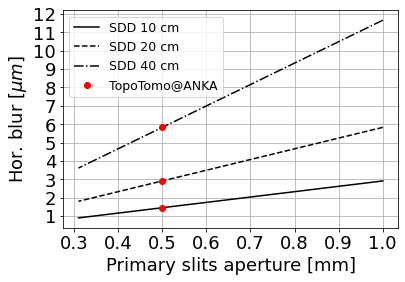

In [91]:
z2 = [0.1, 0.2, 0.4] # [m]
ss_x_topotomo = [0.5e-3, 0.5e-3, 0.5e-3] # [mm] (FWHM)

# plots
f = plt.figure()
plt.plot(ss_x*1e3, (z2[0]/z)*ss_x*1e6, 'k') # SDD 10 cm
plt.plot(ss_x*1e3, (z2[1]/z)*ss_x*1e6, '--k') # SDD 20 cm
plt.plot(ss_x*1e3, (z2[2]/z)*ss_x*1e6, '-.k') # SDD 40 cm
plt.plot(np.multiply(ss_x_topotomo, 1e3), np.divide(z2, z)*0.5*1e3, 'or') # TopoTomo@ANKA
plt.xticks(np.arange(0.3, 1.1, 0.1))
plt.yticks(np.arange(1, 13, 1))

plt.grid(True, which="both")
plt.legend(['SDD 10 cm', 'SDD 20 cm', 'SDD 40 cm', 'TopoTomo@ANKA'], fontsize='x-small')

plt.xlabel('Primary slits aperture [mm]')
plt.ylabel('Hor. blur [$\mu m$]')
f.savefig("slits_VS_Hor_blur.png", bbox_inches='tight', dpi=600)

## Flux density @ sample – Pink and monochromatic beam 
#### Follow link to the notebook -> [BEATS TDR Chapter 07f_d: flux density @ sample](BEATS_TDR-Chapter_07f_Optics_Raytracing-Flux_density.ipynb)